In [20]:
from mangaki.utils.svd import MangakiSVD
from mangaki.utils.als import MangakiALS
from mangaki.utils.pca import MangakiPCA
from mangaki.utils.knn import MangakiKNN
import numpy as np
from mangaki.utils.values import rating_values
from mangaki.utils.data import Dataset
from mangaki.utils.algo import fit_algo, get_algo_backup, get_dataset_backup

#ratings = pandas.read_csv('../data/ratings-ml.csv', header=None).as_matrix()
#works = pandas.read_csv('../data/works-ml.csv', header=None).as_matrix()

triplets = Rating.objects.values_list('user_id', 'work_id', 'choice')
#dataset = Dataset()
#dataset.make_anonymous_data(triplets, convert=lambda choice: rating_values[choice])

#dataset.load_csv('ratings.csv', convert=lambda choice: rating_values[choice], title_filename='works.csv')

titles = Work.objects.values_list('id', 'title')
categories = Work.objects.values_list('id', 'category__slug')

dataset, svd = fit_algo('svd', triplets, titles, categories)

#dataset = get_dataset_backup('svd')
#svd = get_algo_backup('svd')

Computing M: (2050 × 10084)
Chrono: fill and center matrix [14q, 3333ms]
Shapes (2050, 20) (20,) (20, 10084)
Chrono: factor matrix [14q, 1767ms]


In [21]:
#svd = algo
print(svd.predict(dataset.anonymized.X)[:6])
print(dataset.anonymized.y[:6])

[ 1.27976837  1.62113645  1.50921252  0.74468539  1.19983175 -0.2790018 ]
[ 2.   2.   2.   2.   0.1 -0.5]


In [22]:
sampled_items = Work.objects.dpp(5).values_list('id', flat=True)

In [23]:
for work_id in sampled_items:
    #work_id = dataset.decode_work[encoded_work_id]
    print(work_id, dataset.titles[work_id])

2768 Le Château dans le ciel
6 Bleach
4224 All you need is kill
33 Mahou Shoujo Madoka★Magica
13 Code Geass: Hangyaku no Lelouch R2


In [24]:
vectors = svd.VT.T
X = vectors[dataset.encode_works(sampled_items)]
# 1..-1
# X = svd.VT.T[np.array(sampled_items)[np.array([0, 3, 4, 5, 6, 7, 8, 9])]]

In [25]:
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression

clf = LogisticRegression(fit_intercept=True)
# clf = LinearRegression(fit_intercept=False)
clf.fit(X, [-1, -1, 1, 1, 1])
#pred = clf.coef_[0]
predx, predy = clf.coef_[0][:2]
clf.predict_proba(X)

array([[ 0.45514812,  0.54485188],
       [ 0.46523064,  0.53476936],
       [ 0.44413897,  0.55586103],
       [ 0.43740842,  0.56259158],
       [ 0.41470309,  0.58529691]])

In [26]:
#clf.coef_
predx, predy

(0.051525823342672201, -0.088052090768598185)

In [27]:
popular = Work.objects.popular()[:100].values_list('id', flat=True)

<IPython.core.display.Javascript object>


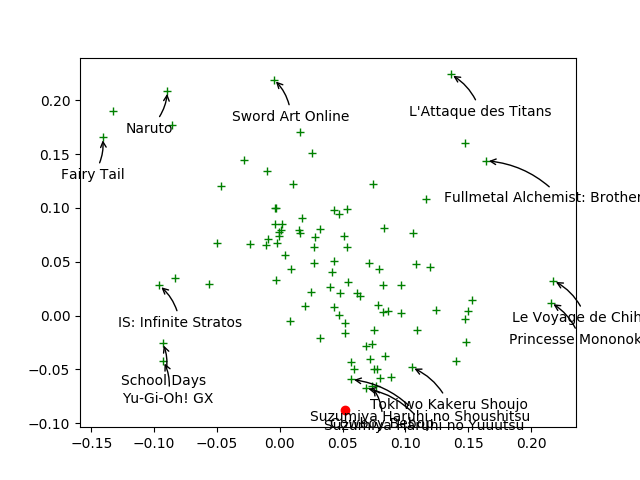

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt

class MangakiViz:
    label = None
    def __init__(self, titles, coords, drawn, featured):
        fig = plt.figure()
        self.label = {}
        for work_id in drawn:
            p_id = dataset.encode_work[work_id]
            x, y = coords[p_id, 0], coords[p_id, 1]
            self.label[(x, y)] = titles[work_id]
            if p_id in featured:
                plt.plot(x, y, 'sb')  # Special points
                self.display(x, y)
            else:
                plt.plot(x, y, '+g', picker=5)
        # plt.plot(jjx, jjy, 'or')
        # plt.plot(predx, predy, 'og')
        fig.canvas.mpl_connect('pick_event', self.onpick)
    
    def display(self, x, y):
        plt.annotate(self.label[(x, y)], xy=(x, y), xycoords='data',
            xytext=(-30, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2")
            )
    
    def where_am_i(self, point):
        plt.plot(point[0], point[1], 'or')
    
    def draw_history(self, history):
        plt.plot(history[:, 0], history[:, 1], 'og')
    
    def onpick(self, event):
        thisline = event.artist
        xdata = thisline.get_xdata()
        ydata = thisline.get_ydata()
        ind = event.ind
        points = tuple(zip(xdata[ind], ydata[ind]))
        x, y = points[0]
        self.display(x, y)

titles = dataset.titles#works[:, 1].tolist()
viz = MangakiViz(titles, svd.VT.T, popular, sampled_items)
# viz.where_am_i((-0.61951029531106994, -0.15674103238147402))  # Old Ryan
viz.where_am_i((clf.coef_[0][:2]))

In [17]:
jj = svd.U[JJ]
for work_id in sampled_items:
    print(titles[work_id], round(jj.dot(svd.VT.T[work_id]), 6))

IndexError: index 1587 is out of bounds for axis 0 with size 668

In [9]:
svd.VT = svd.VT_

In [15]:
u = pandas.read_csv('~/code/qna/notebooks/u.csv').as_matrix()
v = pandas.read_csv('~/code/qna/notebooks/v.csv').as_matrix()
history = pandas.read_csv('~/code/qna/notebooks/testlog.csv').as_matrix()

In [27]:
titles = v[:, 0].tolist()
coords = v[:, [1, 2]]
drawn = range(150)
featured = []
viz = MangakiViz(titles, coords, drawn, featured)
viz.where_am_i(u[1372][[1,2]])
viz.draw_history(history[:, [1, 2]])

TypeError: 'int' object is not subscriptable

In [131]:
predx, predy

(-0.61951029531106994, -0.15674103238147402)

In [86]:
contestants = list(zip(range(len(titles)), titles, clf.predict_proba(svd.VT.T)))
# contestants.sort(key=lambda x: abs(x[2][1] - 0.5))
contestants.sort(key=lambda x: x[2][0])

In [87]:
contestants[:150]  # Hai to Gensou no Grimgar

[(4692, 'Fullmetal Alchemist: Brotherhood', array([ 0.47216452,  0.52783548])),
 (5908, 'Fullmetal Alchemist', array([ 0.47536968,  0.52463032])),
 (2769, 'Clannad', array([ 0.47963831,  0.52036169])),
 (1239, 'Clannad: After Story', array([ 0.48216401,  0.51783599])),
 (5894, 'Angel Beats!', array([ 0.48639984,  0.51360016])),
 (2236,
  'Fullmetal Alchemist: Brotherhood OVA Collection',
  array([ 0.48786182,  0.51213818])),
 (898, 'Toradora!', array([ 0.48877736,  0.51122264])),
 (8078,
  'Clannad After Story: Another World, Kyou Chapter',
  array([ 0.49040025,  0.50959975])),
 (2676, 'Death Note', array([ 0.49061045,  0.50938955])),
 (3509, 'FullMetal Alchemist', array([ 0.49087285,  0.50912715])),
 (5147, 'Spice & Wolf', array([ 0.49166404,  0.50833596])),
 (2112, 'Spice & Wolf II', array([ 0.49182697,  0.50817303])),
 (3395, 'Clannad - Movie', array([ 0.49185913,  0.50814087])),
 (7851,
  'Clannad: Another World, Tomoyo Chapter',
  array([ 0.49202264,  0.50797736])),
 (6555, 'Elfen

In [192]:
class Data:
    def __init__(self):
        self.sampled_items = sampled_items.tolist()
        # self.X = svd.VT.T[self.sampled_items]
        self.y = [0, 1, 1, 1, 1]
    
    def get_all_ratings(self):
        self.sampled_items = []
        self.y = []
        rating_values = {'favorite': 1, 'like': 1}
        for user_id, work_id, choice in ratings:
            if user_id == JJ:
                self.sampled_items.append(work_id)
                self.y.append(rating_values.get(choice, 0))
        self.X = svd.VT.T[self.sampled_items]
        print(len(self.X), 'ratings')

    def add(self, extra):
        for work_id, outcome in extra:
            self.sampled_items.append(work_id)
            self.y.append(outcome)
        self.X = svd.VT.T[self.sampled_items]

# extra = [(332, 1), (2060, 1), (7726, 1)]
ryan = Data()
# ryan.add(extra)
ryan.get_all_ratings()
clf.fit(ryan.X, ryan.y)

519 ratings


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
import pprint

contestants = list(zip(titles, svd.VT[1, :]))
contestants.sort(key=lambda x: x[1])
print('Bottom 20')
pprint.pprint(contestants[:20])
print('Top 20')
pprint.pprint(contestants[-20:])

Bottom 20
[('Batman & Robin (1997)', -0.071479555237976555),
 ('Batman Forever (1995)', -0.062339356328242959),
 ('Anaconda (1997)', -0.061265098301348533),
 ('Johnny Mnemonic (1995)', -0.056055123715577998),
 ('Ace Ventura: When Nature Calls (1995)', -0.054605815337604932),
 ('Twister (1996)', -0.054268058423177362),
 ('Godzilla (1998)', -0.054193368340371632),
 ('Honey, I Shrunk the Kids (1989)', -0.053539310985434456),
 ('Crocodile Dundee II (1988)', -0.053506539790670764),
 ('Wild Wild West (1999)', -0.052991788797229662),
 ('Armageddon (1998)', -0.052913667310587331),
 ('Police Academy 6: City Under Siege (1989)', -0.050504185913203659),
 ('Speed 2: Cruise Control (1997)', -0.050410674165109554),
 ('Planet of the Apes (2001)', -0.049178786831054179),
 ('Broken Arrow (1996)', -0.048346855051642559),
 ('Mission: Impossible II (2000)', -0.047927744563459031),
 ('Police Academy 4: Citizens on Patrol (1987)', -0.047569022384734566),
 ('Pearl Harbor (2001)', -0.046790820467736534),
 ('S